# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

<AxesSubplot:>

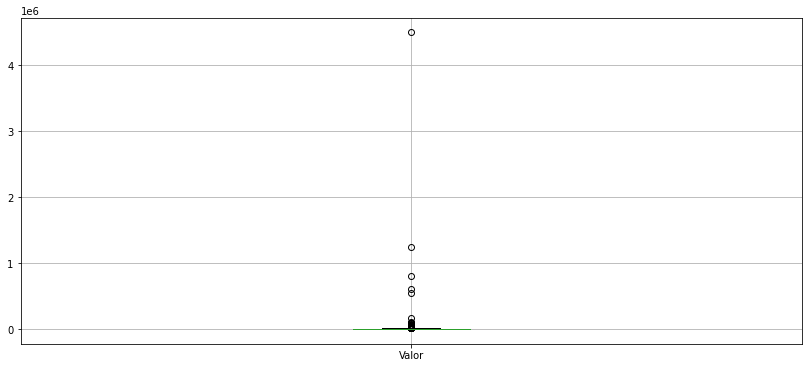

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN


In [5]:
valor = dados['Valor']

In [6]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [7]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

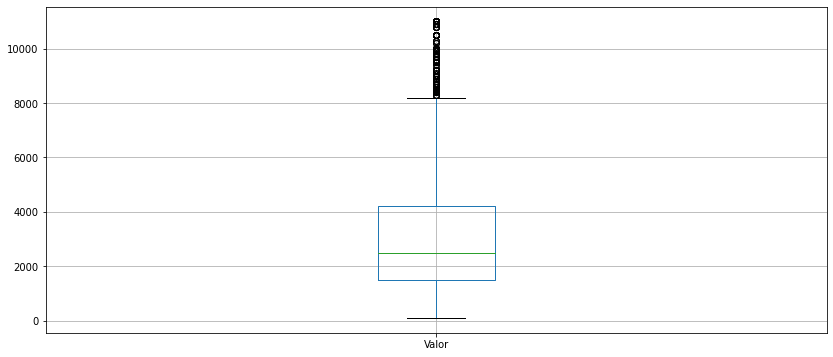

In [8]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

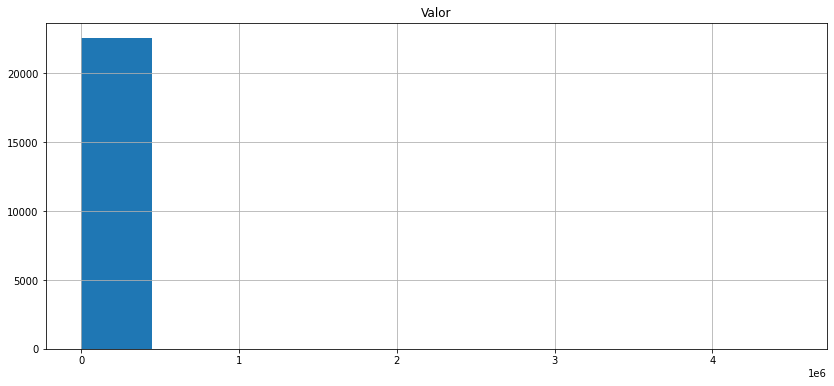

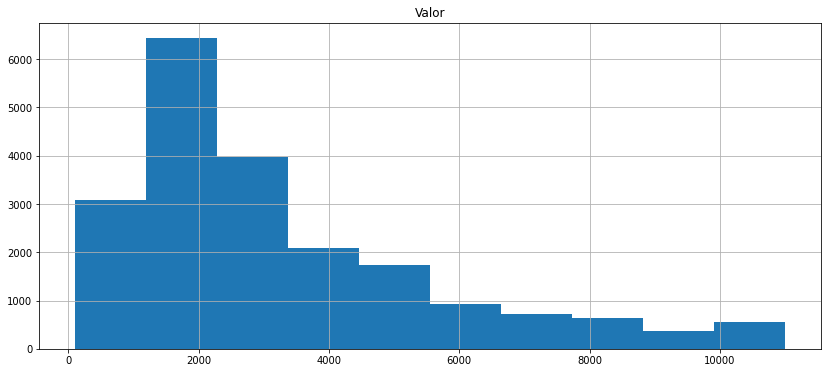

In [9]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers (continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

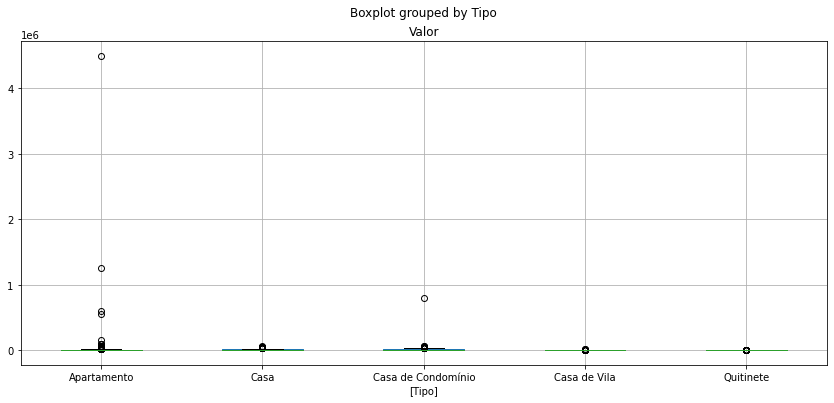

In [10]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [11]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [12]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [13]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 5, 8, 9, 10, 11, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 24, 56, 60, 100, 104, 150, 166, 188, 248, 260, 263, 274, 297, 321, 327, 345, 350, 368, 389, 396, 410, 436, 446, 486, 487, 493, 526, 558, 559, 583, 587, 588, 636, 639, 648, 654, 655, 680, 697, 721, 742, 745, 781, 792, 802, 880, 897, 962, 1011, 1059, 1066, 1149, 1154, 1156, 1189, 1211, 1284, 1291, 1354, 1373, 1388, 1409, 1451, 1465, 1469, 1480, 1485, 1513, 1516, 1530, 1630, 1649, 1683, 1705, 1711, 1715, 1721, 1734, 1760, 1768, 1815, 1865, 1890, 1930, 1961, 1989, 1998, 2017, 2082, 2102, 2119, 2139, 2165, 2171, 2172, 2199, 2238, 2270, 2273, ...], 'Casa

In [14]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [15]:
Q1

Tipo
Apartamento           1600.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [16]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [17]:
IIQ

Tipo
Apartamento            3400.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [18]:
limite_inferior

Tipo
Apartamento           -3500.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [19]:
limite_superior

Tipo
Apartamento           10100.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [20]:
limite_superior['Casa']

22850.0

<img src="Box-Plot.png" width=70%>

In [21]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

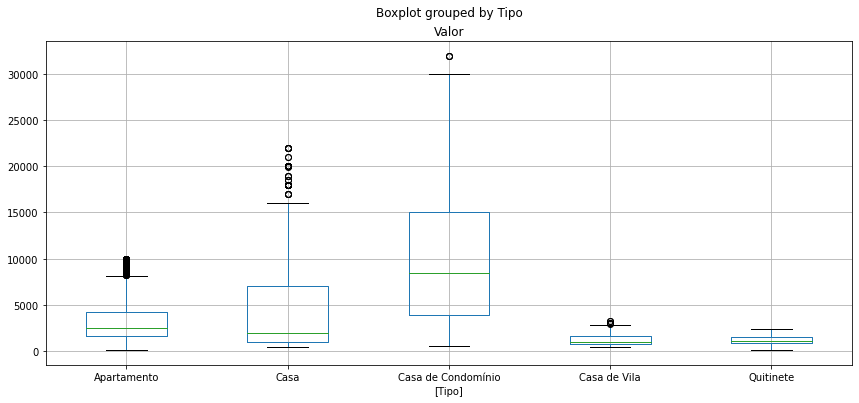

In [22]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [23]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)